In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data  Understanding

Here is the features and their descriptions:
1. Age  

2. Sex  

3. cp - Chest Pain Type : Including 4 types: typical angina, atypical angina, non-anginal pain, or may even be asymptomatic. 

4. trtbps - Resting Blood Pressure ()  

5. chol - Serum Cholesterol  :  It should be normally 12/8 mmHg (or 128 in this data set). 

6. fbs - Fasting Blood Sugar : FBS level less than 100 mg/dL is considered normal. 100-125 mg/dL is considered prediabetes, and 126 mg/dL or higher on two separate tests means you have diabetes. Here if the last FBS level is high, the FBS column is considered to be 1 , and  zero otherwise.
 
7. restecg - Resting Electrocardiographic Results : 3 values are considered here: Normal EGC corresponds to 0 and abnormal left ventricular hypertrophy is denoted by 1 and heart arrhythmias corresponds to 2.

8. thalachh - Maximum Heart Rate Achieved : The maximum heart rate during exercise or stress testing. 

9. exang- Exercise Induced Angina : This happens when the heart muscle doesn't get as much blood and oxygen as it needs for the level of physical activity, causing chest pain or discomfort. It is a binary feature.

10. oldpeak - ST Depression Induced by Exercise Relative to Rest: Changes in the ST segment on an ECG can indicate heart disease. ST depression can indicate ischemia, or lack of sufficient blood flow to the heart muscle.

11. slope-The Slope of The Peak Exercise ST Segment: The ST segment/heart rate slope (ST/HR slope), has been introduced as an index of relative myocardial oxygen demand during exercise. This feature takes 3 values: 0,1,2 dependig to the distance of the peaksto the horizontal line in EGC.

12. ca- Number of Major Vessels Colored by Flourosopy  : Higher numbers indicate more severe disease.

13. thall- Thallium Stress Test  : The nuclear imaging results which shows method that shows how well blood flows into the heart muscle, both at rest and during activity.

14. target - Diagnosis of Heart Disease :  A value of 0 indicates less than 50% diameter narrowing - not a significant heart disease, while a value of 1 indicates more than 50% diameter narrowing - a significant heart disease.

The following table shows the nuber of unique values in each feature and their maximum and minimum values in each of them:


In [3]:
t=pd.DataFrame({"nunique":[], "min":[] , "max":[]})
for x in df.columns:
    t.loc[x]= [ df[x].nunique() , df[x].min() , df[x].max()]
t=t.sort_values('nunique')
print(t)

          nunique    min    max
sex           2.0    0.0    1.0
fbs           2.0    0.0    1.0
exang         2.0    0.0    1.0
target        2.0    0.0    1.0
restecg       3.0    0.0    2.0
slope         3.0    0.0    2.0
cp            4.0    0.0    3.0
thal          4.0    0.0    3.0
ca            5.0    0.0    4.0
oldpeak      40.0    0.0    6.2
age          41.0   29.0   77.0
trestbps     49.0   94.0  200.0
thalach      91.0   71.0  202.0
chol        152.0  126.0  564.0


As you see some of these features seem to be categorical and some others are numerical:

In [4]:
categorical_cols=['restecg' , 'slope' , 'cp' , 'thal' , 'ca']
numeric_cols=['oldpeak' , 'age' , 'trestbps', 'thalach', 'chol' ]

# Data Pre-Processing

As we saw, there is no null value in any feature. So we go through checking numerical features distributions and also applying one-hot encoding on categorical features.  

In [5]:
 
for column in categorical_cols: 
        df = pd.get_dummies(df, columns=[column])


The following charts show the histogram of numerical features.

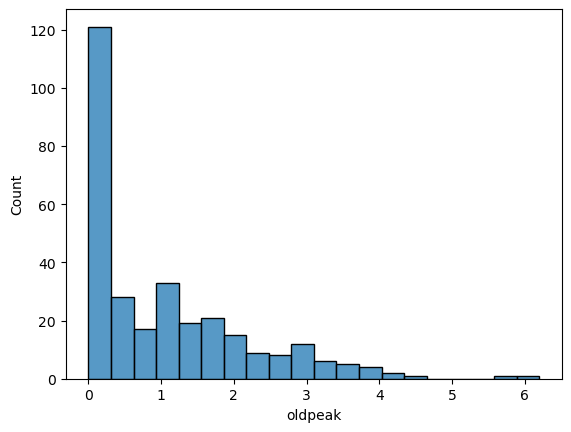

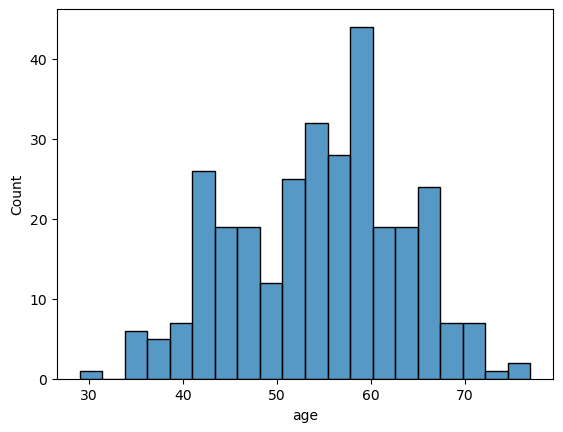

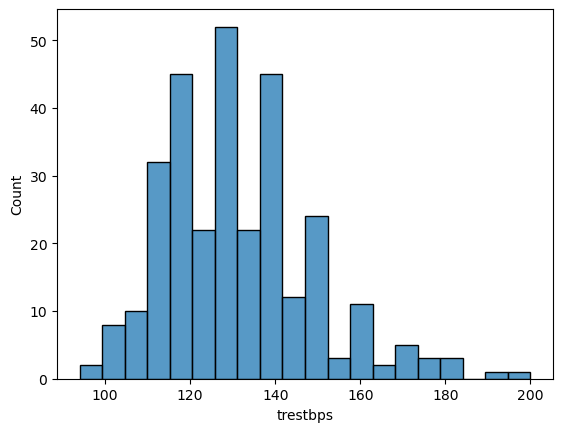

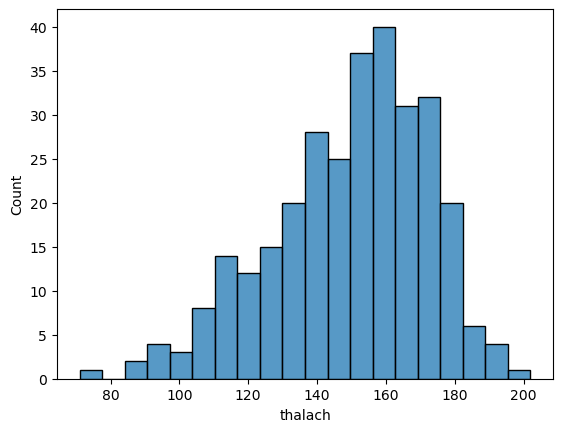

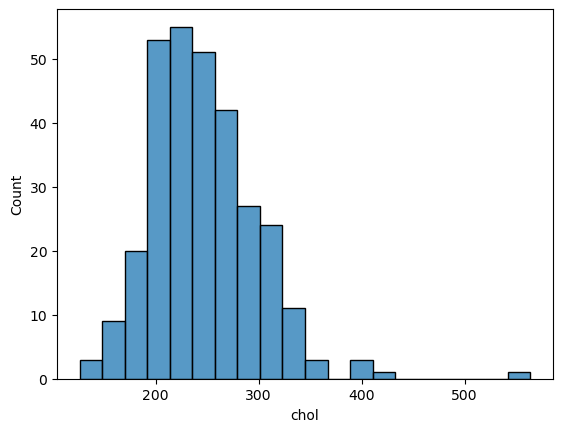

In [6]:
for x in numeric_cols:
    sns.histplot(data=df, x=x , bins=20)  
    plt.show()

 Except for the 'oldpeak' column, we can try using some transformations to make the distribution of the features to be normal. For the numeric features 'age' , 'trestbps', 'thalach' and 'chol', we used the "yeojohnson" transfromation to make the transformed features to be closer to the normal distribution. We also used Shapiro test and the confidence level 0.05 to show that how each transformed feature become closer to the normal distribution.  

In the following, we see that except for the 'age' feature, other features are closer to the normal distribution due to confidence level 0.05:


age: Pvalue_before=0.005800595041364431 , Pvalue_after=0.019423190504312515


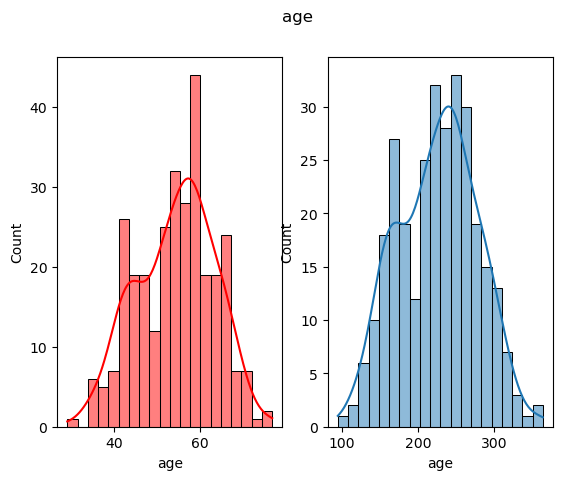

trestbps: Pvalue_before=1.4575286968465662e-06 , Pvalue_after=0.06527616828680038


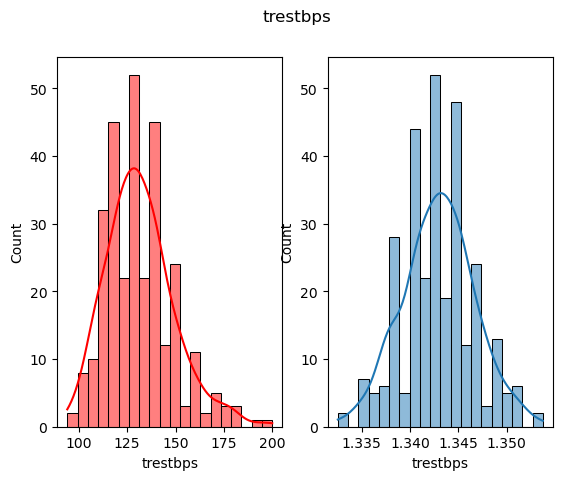

thalach: Pvalue_before=6.620732165174559e-05 , Pvalue_after=0.12962768971920013


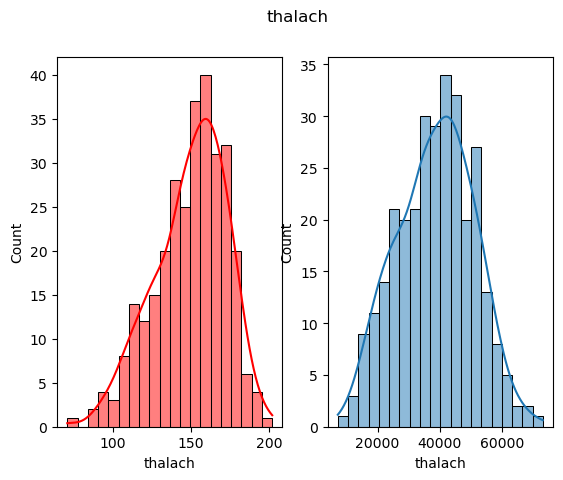

chol: Pvalue_before=5.364368060867264e-09 , Pvalue_after=0.1608712524175644


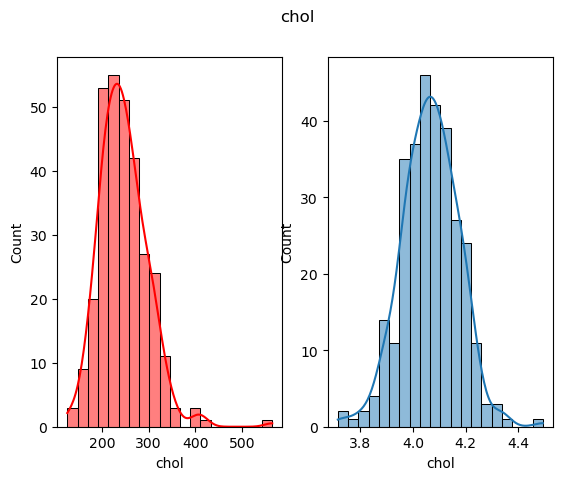

In [7]:
from scipy import stats 

def transform (df ,cols ,show_hists=True ):
        trans_df=df.copy()
        for column in cols: 
            _, pvalue_before = stats.shapiro(df[column])
            #Apply suitable function to make features normally distributed    
            trans_df[column], _ = stats.yeojohnson(df[column] + 1)
            #check whether the distribution got normal or not
            _, pvalue = stats.shapiro(trans_df[column]) 
            print("{}: Pvalue_before={} , Pvalue_after={}".format(column,pvalue_before , pvalue))
            if (show_hists==True):
                    #*********
                    #Plot the distributions of features and their transformed case   
                    #*********
                    fig , axes=plt.subplots(1,2)
                    sns.histplot(data=df , x=column , ax=axes[0]  ,kde=True , bins=20 , color='red')
                    sns.histplot(data=trans_df , x=column , ax=axes[1] , kde=True , bins=20 )
                    plt.suptitle(column)
                    plt.show()
        return(trans_df)
    
tr_cols=numeric_cols
try:
    tr_cols.remove('oldpeak')  
except:
     pass   
tr_df = transform (df , tr_cols ,show_hists=True) 
tr_df['oldpak']=np.log10(0.1+df['oldpeak'])

In order to achieve more normal distributions, we can split our dataframe into two parts: Women and Men. Since they are independent, we can break our dataframe into these two dataframes and implement our analysis for each of them independently.

age: Pvalue_before=0.03999100252985954 , Pvalue_after=0.07999721169471741


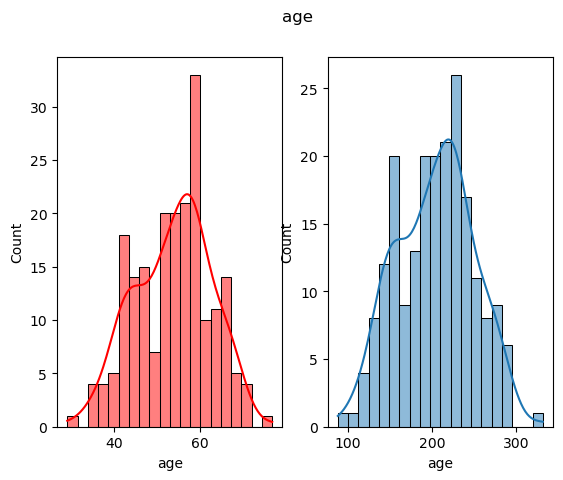

trestbps: Pvalue_before=0.00010648644820321351 , Pvalue_after=0.18902188539505005


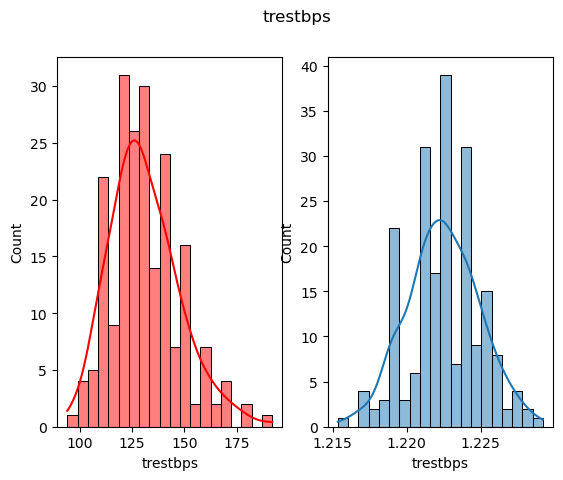

thalach: Pvalue_before=0.008710460737347603 , Pvalue_after=0.3667761981487274


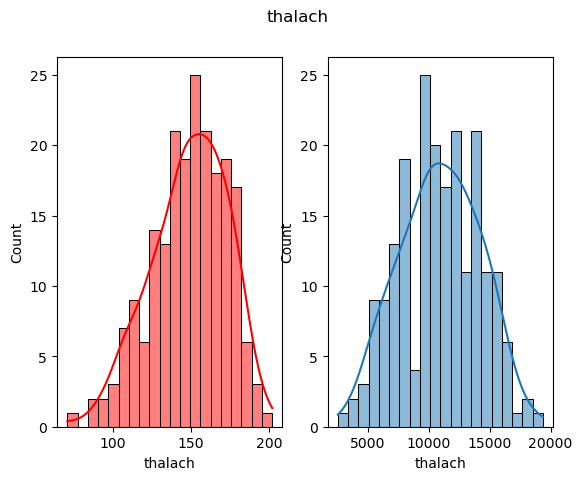

chol: Pvalue_before=0.5273769497871399 , Pvalue_after=0.7901140451431274


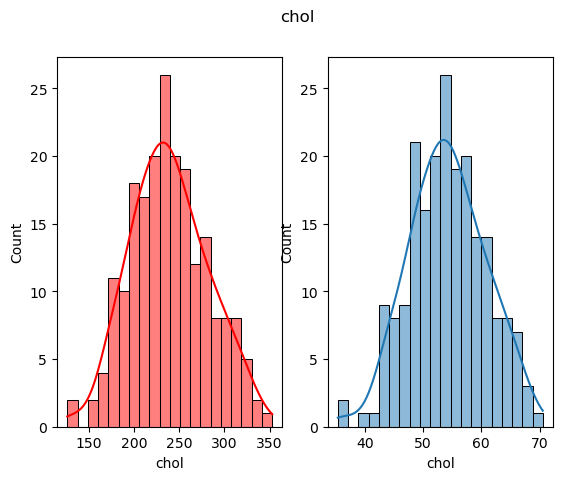

In [8]:
women = df.loc[df.sex==1]
tr_women = transform (women , tr_cols)  

age: Pvalue_before=0.1385604441165924 , Pvalue_after=0.3290887176990509


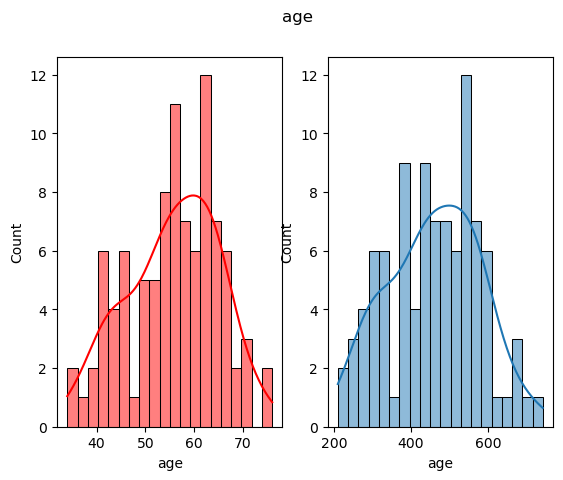

trestbps: Pvalue_before=0.006315131671726704 , Pvalue_after=0.4323125183582306


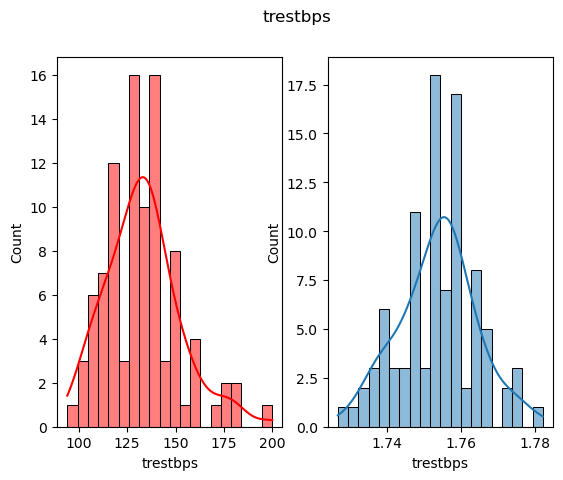

thalach: Pvalue_before=0.0004753054236061871 , Pvalue_after=0.15838399529457092


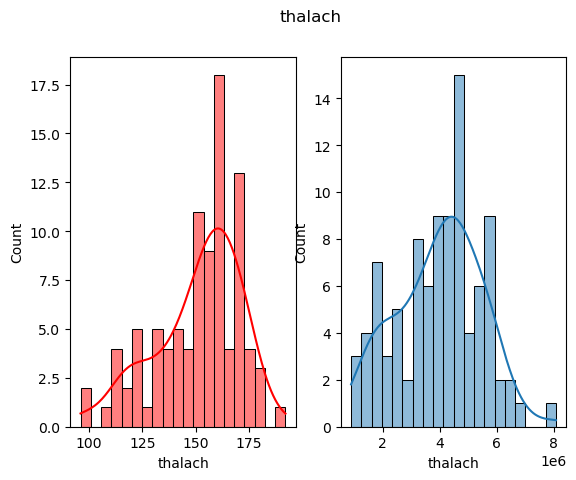

chol: Pvalue_before=3.0168079319992103e-05 , Pvalue_after=0.8540707230567932


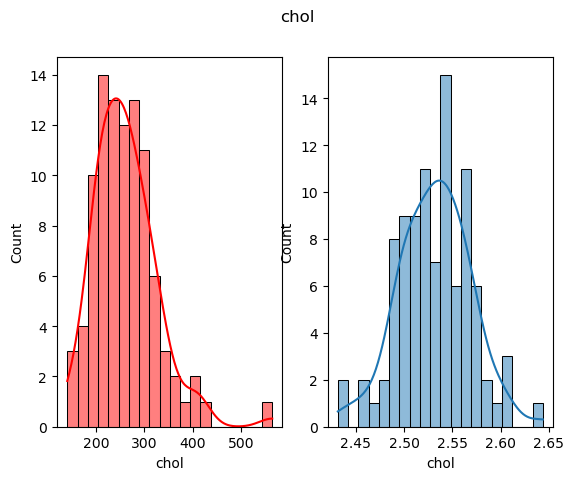

In [9]:
men = df.loc[df.sex==0]      
tr_men = transform (men ,tr_cols)       

As we saw, in the case of devided dataframes (i.e. separate dataframes for women and men), the distributions of aformentioned features are significantly closer to the normal distribution in compare with the case when we had only one dataframe. Hence, we work with two dataframes from now on: Women and Men.

In [10]:
men=tr_men
women=tr_women

## Modeling

### Data splitting

In [11]:
Xindexes=list(df.columns)
try:
    Xindexes.remove('target')
    Xindexes.remove('sex')
except:
    pass 
X_men=np.array(men[Xindexes])
y_men=np.ravel(men.target)
X_women=np.array(women[Xindexes])
y_women=np.ravel(women.target)

### Evaluation metrics

In [12]:
from sklearn import metrics 
from sklearn.metrics import make_scorer, recall_score
  
def recall_score_1(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=1)

recall_scorer = make_scorer(recall_score_1)

my_scoring = {"recall_1":recall_scorer ,"f1": 'f1'}


### Models' pipelines

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_names=['svc_standard' ,'svc_minmax' , 'knn' , 'dtree' , 'rforest']
piplines={}
param_grids={}

piplines['svc_standard'] = Pipeline([('scaler', StandardScaler()), ('clf', SVC())] )
param_grids['svc_standard'] = {'clf__C': [0.7, 0.8, 1 ],
                     'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                     'clf__degree':[1,2,3,4],
                     'clf__random_state': [42, 100, 2022]
                    }
piplines['svc_minmax'] = Pipeline([('scaler', MinMaxScaler()), ('clf', SVC())] )
param_grids['svc_minmax'] = {'clf__C': [0.5,0.6, 0.7, 0.8,0.9, 1],
                     'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                     'clf__degree':[1,2,3,4,5],
                     'clf__random_state': [42, 100, 2022]
                    }

piplines['knn'] = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())] )
param_grids['knn'] = {'clf__n_neighbors': [5,6,7,8,9,11],
                      'clf__weights': ['uniform']
                      #'clf__weights': ['uniform', 'distance']
                    }


piplines['dtree'] = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())] )
param_grids['dtree'] = {'clf__criterion':['gini', 'entropy', 'log_loss']
                    }

piplines['rforest'] = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())] )
param_grids['rforest'] = {'clf__n_estimators':[4,5,6,10,15],
                          'clf__criterion':['gini', 'entropy', 'log_loss']
                    }


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_names=['svc_standard' ,'svc_minmax' , 'knn' , 'dtree' , 'rforest']
piplines={}
param_grids={}

piplines['svc_standard'] = Pipeline([('scaler', StandardScaler()), ('clf', SVC())] )
param_grids['svc_standard'] = {'clf__C': [0.7, 0.8, 1 ],
                     'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                     'clf__degree':[1,2,3,4],
                     'clf__random_state': [42, 100, 2022]
                    }
piplines['svc_minmax'] = Pipeline([('scaler', MinMaxScaler()), ('clf', SVC())] )
param_grids['svc_minmax'] = {'clf__C': [0.5,0.6, 0.7, 0.8,0.9, 1],
                     'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                     'clf__degree':[1,2,3,4,5],
                     'clf__random_state': [42, 100, 2022]
                    }

piplines['knn'] = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())] )
param_grids['knn'] = {'clf__n_neighbors': [5,6,7,8,9,11],
                      'clf__weights': ['uniform']
                      #'clf__weights': ['uniform', 'distance']
                    }


piplines['dtree'] = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())] )
param_grids['dtree'] = {'clf__criterion':['gini', 'entropy', 'log_loss']
                    }

piplines['rforest'] = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())] )
param_grids['rforest'] = {'clf__n_estimators':[4,5,6,10,15],
                          'clf__criterion':['gini', 'entropy', 'log_loss']
                    }


### Models' gridsearch

In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def go_gridSearch( X, y ,pipline , param_grid , cv , scorer):
    gs = GridSearchCV(pipline, param_grid, cv=cv , scoring=scorer)
    gs.fit(X, y)
    best_score = gs.best_score_
    best_params = gs.best_params_ 
    best_estimator = gs.best_estimator_
    return( best_score , best_params , best_estimator)


gridsearch_results=pd.DataFrame({'group':[] , 'model': [] , 'scorer':[] , 'best_score': [] , 'best_params': [] , 'best_estimator': []})
for group in ['women','men']:
    (X, y)= (X_women, y_women) if (group== 'women') else (X_men, y_men) 
    for model in model_names:
        for scorer in my_scoring:
                    b_scr , b_prm , b_est = go_gridSearch( X, y ,
                                                          pipline = piplines[model] ,
                                                          param_grid = param_grids[model] ,
                                                          cv=5 , 
                                                          scorer=my_scoring[scorer] )
                    gridsearch_results.loc[len(gridsearch_results.index)] = [group, model, scorer ,b_scr , b_prm , b_est]


women_results = gridsearch_results.loc[gridsearch_results.group=='women']
men_results = gridsearch_results.loc[gridsearch_results.group=='men']


In [15]:
men_results.sort_values(by=['best_score'] ,ascending=False)

,group,model,scorer,best_score,best_params,best_estimator
10,men,svc_standard,recall_1,1.000000,"{'clf__C': 0.7, 'clf__degree': 4, 'clf__kernel...","(StandardScaler(), SVC(C=0.7, degree=4, kernel..."
12,men,svc_minmax,recall_1,1.000000,"{'clf__C': 0.5, 'clf__degree': 1, 'clf__kernel...","(MinMaxScaler(), SVC(C=0.5, degree=1, kernel='..."
14,men,knn,recall_1,1.000000,"{'clf__n_neighbors': 5, 'clf__weights': 'unifo...","(StandardScaler(), KNeighborsClassifier())"
18,men,rforest,recall_1,0.985714,"{'clf__criterion': 'gini', 'clf__n_estimators'...","(StandardScaler(), (DecisionTreeClassifier(max..."
13,men,svc_minmax,f1,0.960359,"{'clf__C': 0.5, 'clf__degree': 3, 'clf__kernel...","(MinMaxScaler(), SVC(C=0.5, kernel='poly', ran..."
19,men,rforest,f1,0.947485,"{'clf__criterion': 'gini', 'clf__n_estimators'...","(StandardScaler(), (DecisionTreeClassifier(max..."
15,men,knn,f1,0.941867,"{'clf__n_neighbors': 5, 'clf__weights': 'unifo...","(StandardScaler(), KNeighborsClassifier())"
11,men,svc_standard,f1,0.934881,"{'clf__C': 0.8, 'clf__degree': 1, 'clf__kernel...","(StandardScaler(), SVC(C=0.8, degree=1, kernel..."
17,men,dtree,f1,0.890163,{'clf__criterion': 'gini'},"(StandardScaler(), DecisionTreeClassifier())"
16,men,dtree,recall_1,0.888571,{'clf__criterion': 'log_loss'},"(StandardScaler(), DecisionTreeClassifier(crit..."


In [16]:
women_results.sort_values(by=['best_score'] ,ascending=False)

,group,model,scorer,best_score,best_params,best_estimator
2,women,svc_minmax,recall_1,0.838012,"{'clf__C': 0.7, 'clf__degree': 3, 'clf__kernel...","(MinMaxScaler(), SVC(C=0.7, kernel='poly', ran..."
0,women,svc_standard,recall_1,0.816959,"{'clf__C': 0.8, 'clf__degree': 1, 'clf__kernel...","(StandardScaler(), SVC(C=0.8, degree=1, kernel..."
4,women,knn,recall_1,0.816374,"{'clf__n_neighbors': 9, 'clf__weights': 'unifo...","(StandardScaler(), KNeighborsClassifier(n_neig..."
5,women,knn,f1,0.807790,"{'clf__n_neighbors': 9, 'clf__weights': 'unifo...","(StandardScaler(), KNeighborsClassifier(n_neig..."
3,women,svc_minmax,f1,0.806595,"{'clf__C': 0.8, 'clf__degree': 3, 'clf__kernel...","(MinMaxScaler(), SVC(C=0.8, kernel='poly', ran..."
1,women,svc_standard,f1,0.804092,"{'clf__C': 0.8, 'clf__degree': 1, 'clf__kernel...","(StandardScaler(), SVC(C=0.8, degree=1, kernel..."
8,women,rforest,recall_1,0.763158,"{'clf__criterion': 'entropy', 'clf__n_estimato...","(StandardScaler(), (DecisionTreeClassifier(cri..."
9,women,rforest,f1,0.761815,"{'clf__criterion': 'gini', 'clf__n_estimators'...","(StandardScaler(), (DecisionTreeClassifier(max..."
7,women,dtree,f1,0.733843,{'clf__criterion': 'log_loss'},"(StandardScaler(), DecisionTreeClassifier(crit..."
6,women,dtree,recall_1,0.721637,{'clf__criterion': 'entropy'},"(StandardScaler(), DecisionTreeClassifier(crit..."


In [17]:
print(women_results.iloc[0,4])

{'clf__C': 0.8, 'clf__degree': 1, 'clf__kernel': 'poly', 'clf__random_state': 42}
